## Match Preview

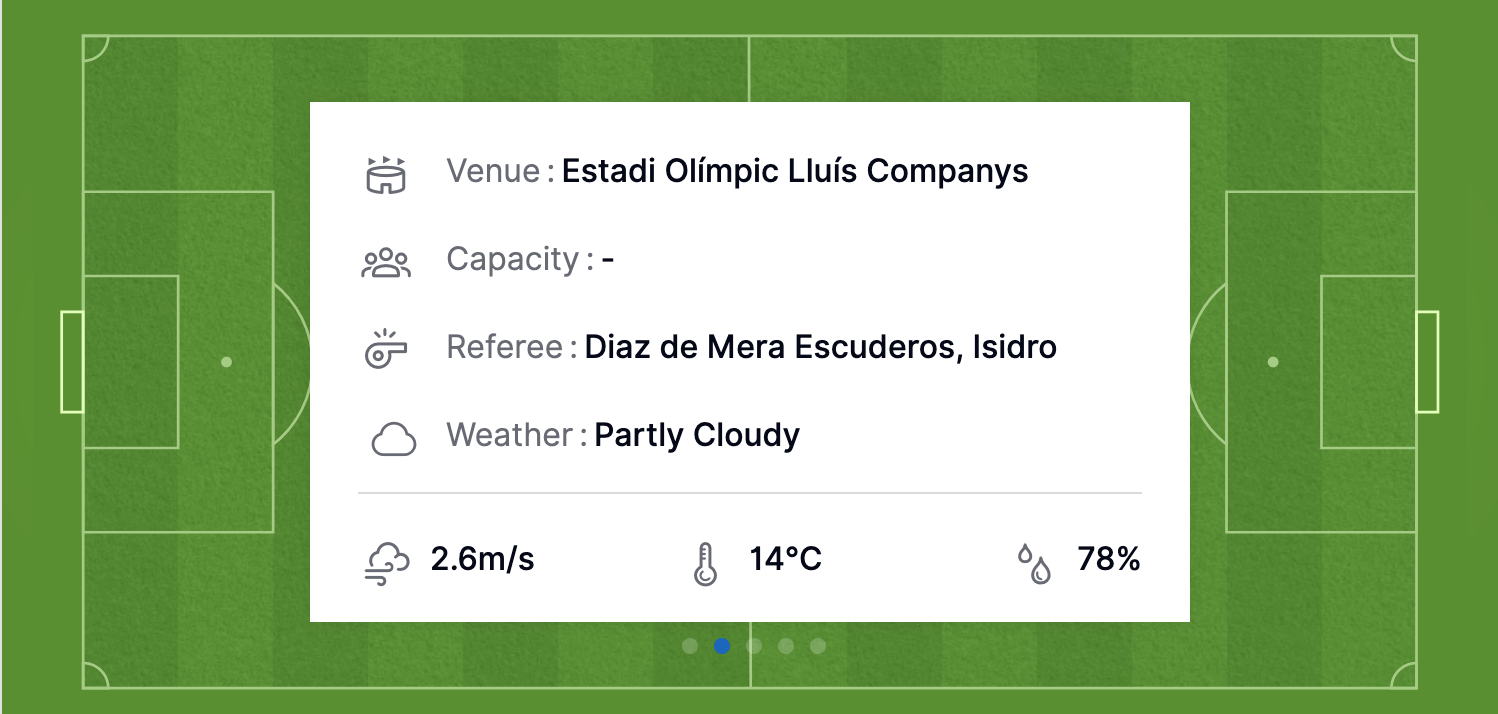

In [139]:
from IPython.display import Image, display
display(Image(filename='img/weather.png', embed=True))

## Head 2 Head

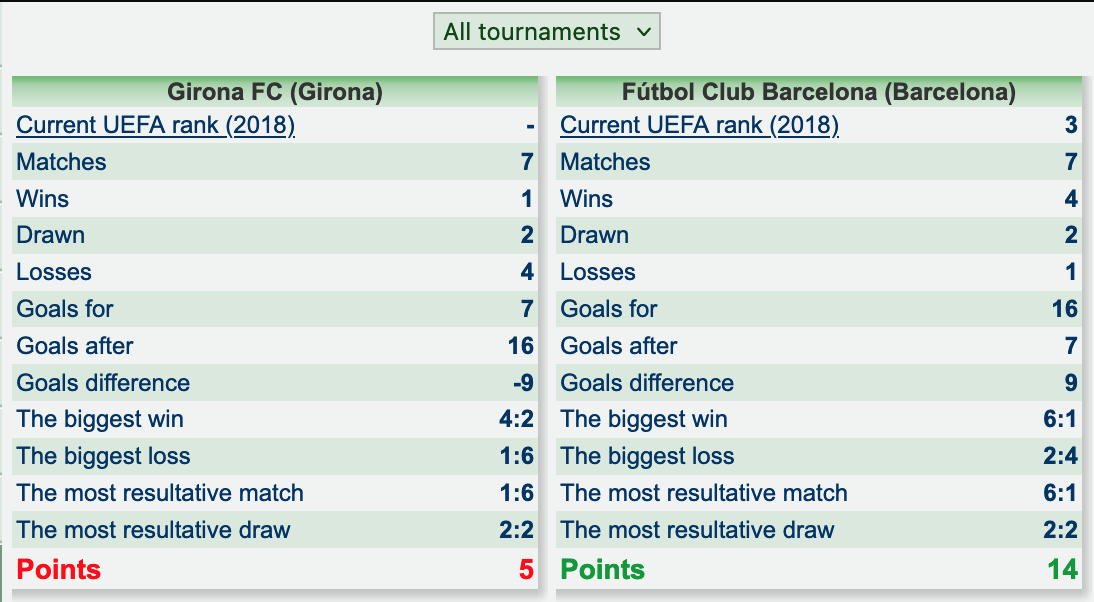

In [141]:
display(Image(filename='img/club_stats.png', embed=True))

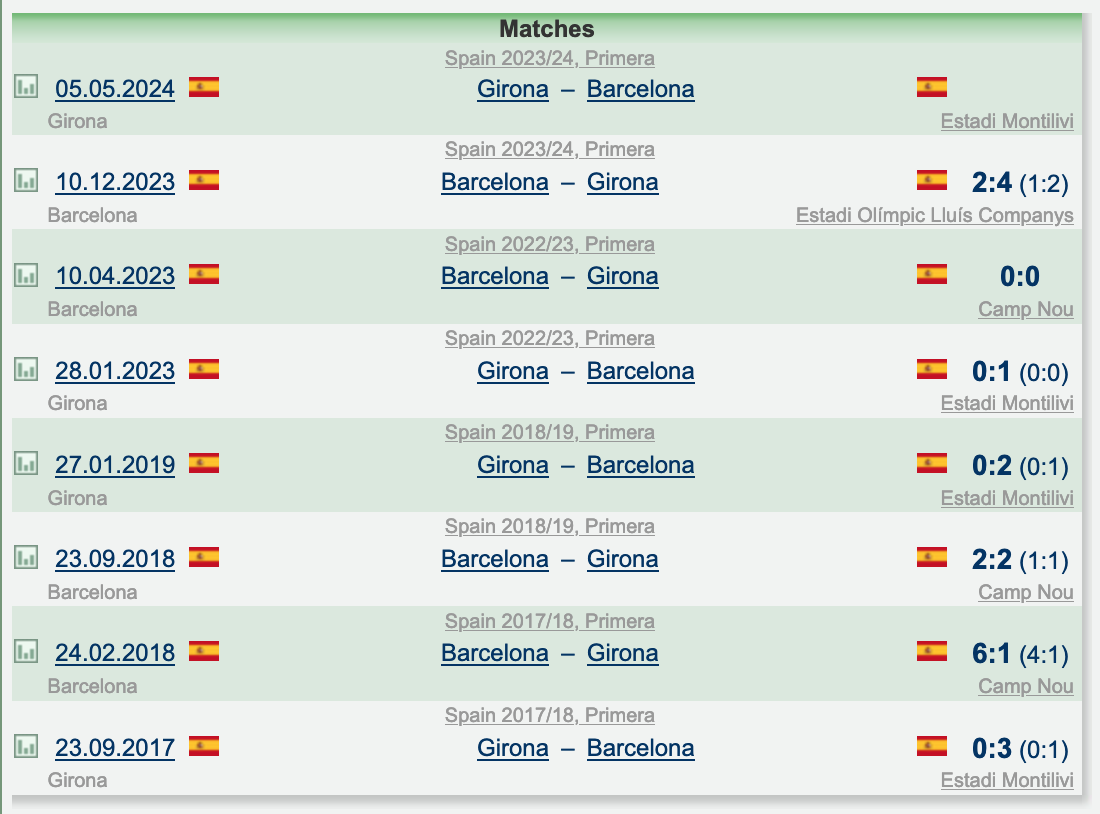

In [142]:
display(Image(filename='img/history2.png', embed=True))

## Pre Match Odds

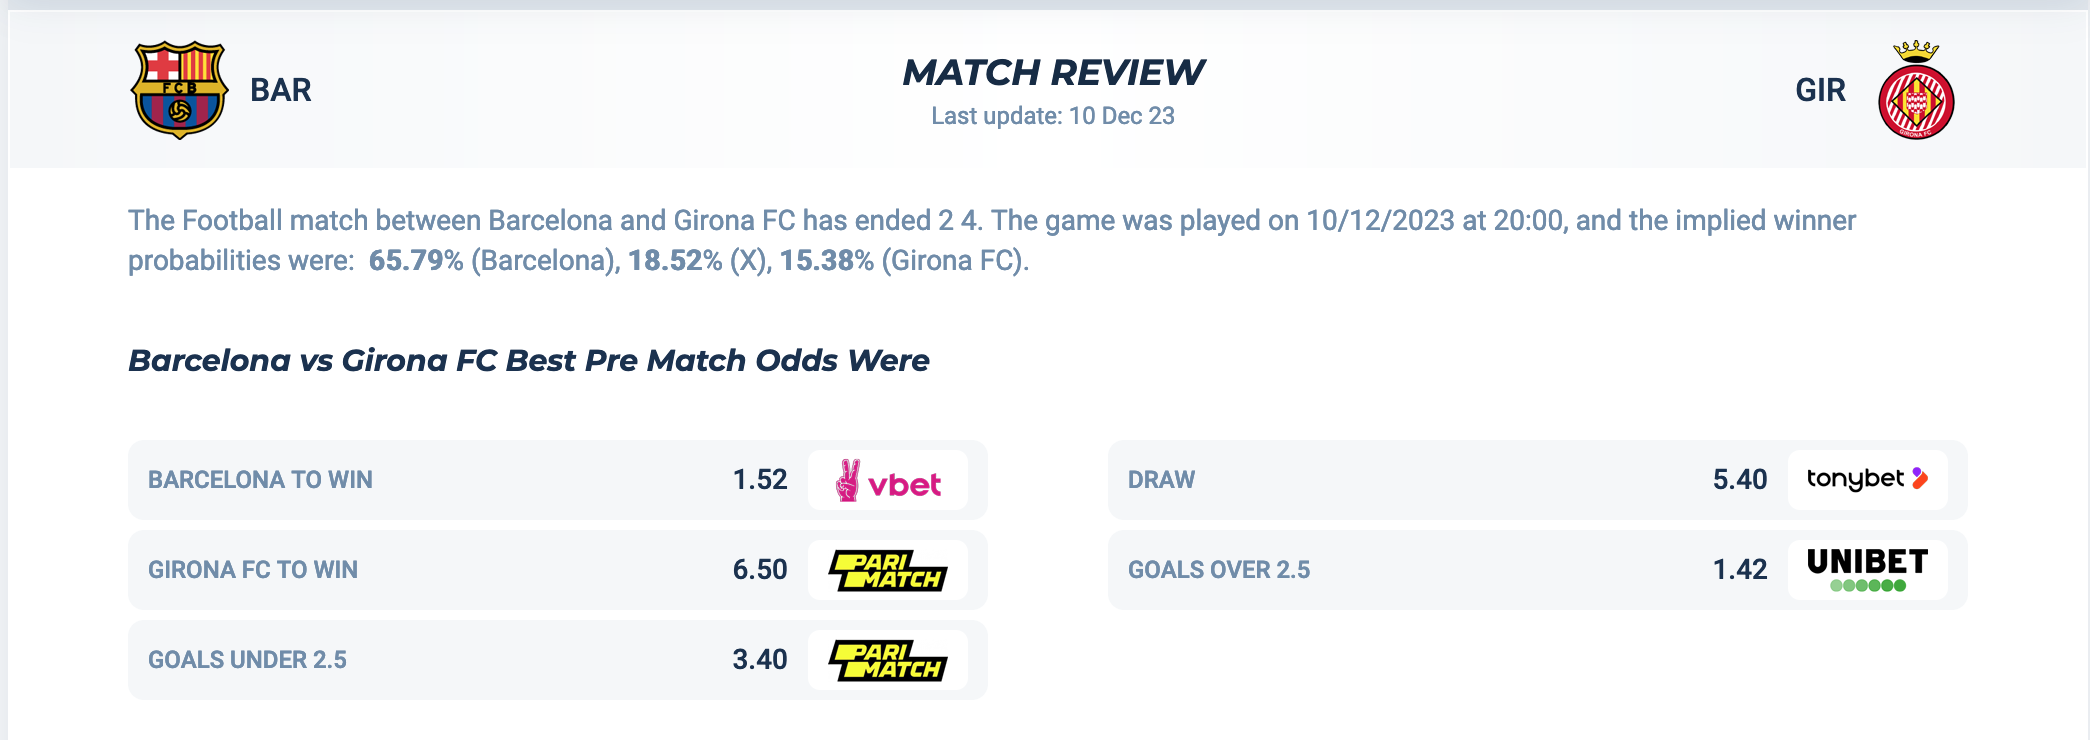

In [143]:
display(Image(filename='img/odds.png', embed=True))

## A.Dovbyk Score

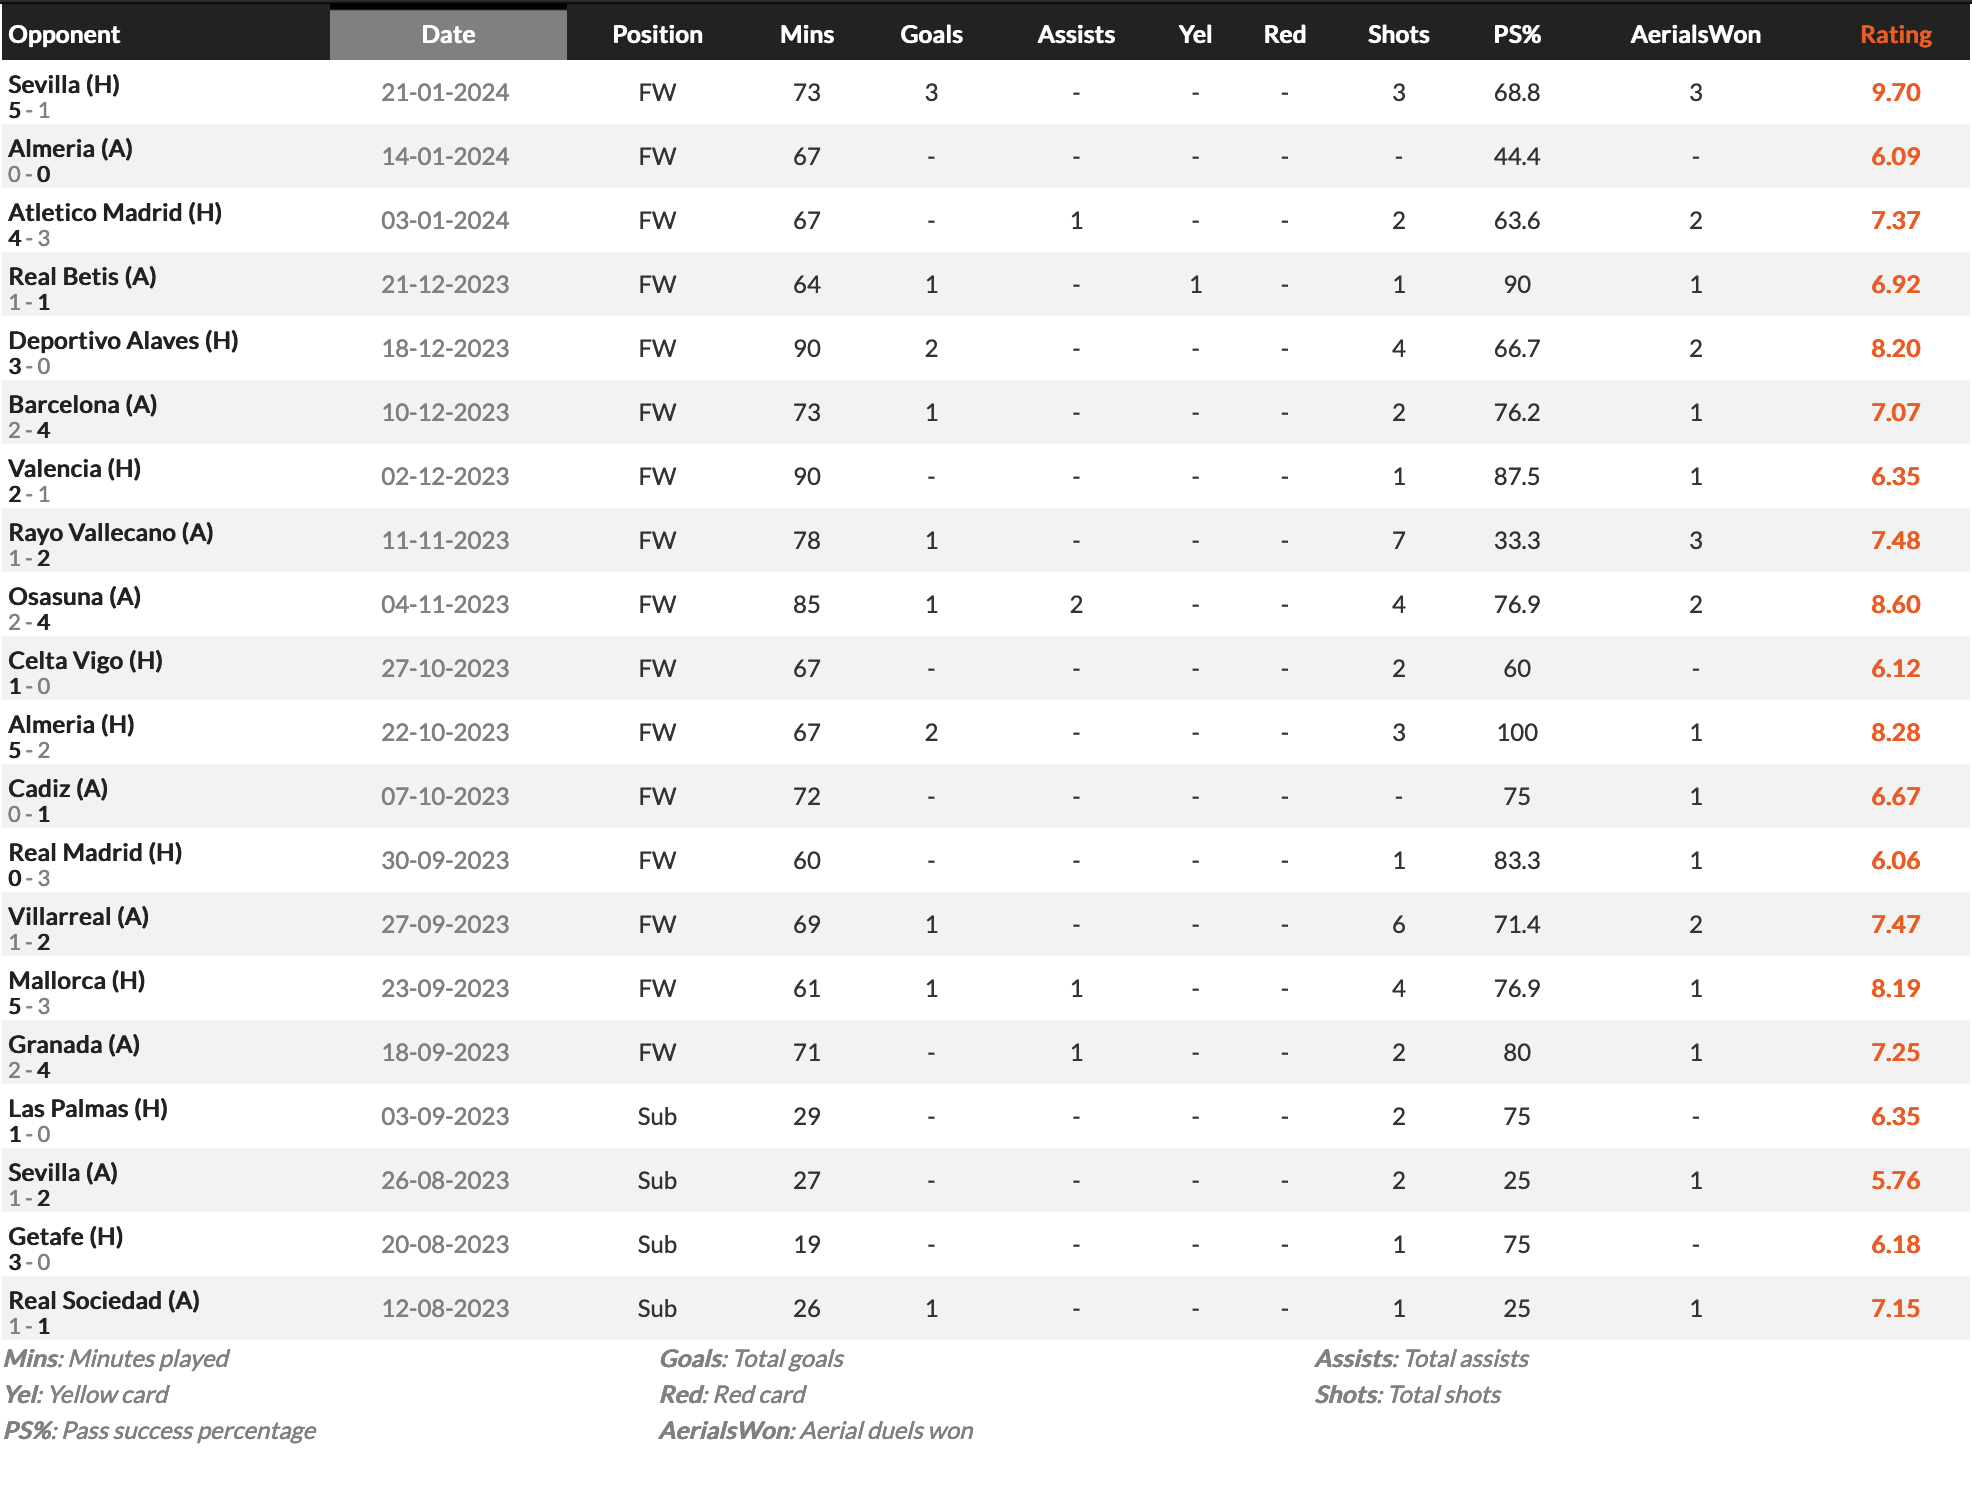

In [144]:
display(Image(filename='img/Dovbyk2.png', embed=True))

## Match Summary - Key Statistics

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import json
import re


# Load data from the sofascore file
with open('data/merged_match_data.json', 'r') as f:
    match_statistics = json.load(f)


def show_stats_data(group):
    labels = []
    first_team_values = []
    second_team_values = []

    for sub_item in group['statisticsItems']:
        labels.append(sub_item['name'])
        first_team_values.append(sub_item['homeValue'])
        second_team_values.append(sub_item['awayValue'])

    fig, ax = plt.subplots(figsize=(10, 6))

    p1 = ax.barh(labels, first_team_values, color='#004D98', label='Barcelona')
    p2 = ax.barh(labels, [-val for val in second_team_values], color='#cd2534', label='Girona')

    for rect in p1:
        width = rect.get_width()
        ax.text(width, rect.get_y() + rect.get_height() / 2, f'{round(width, 2)}', ha='left', va='center')

    for rect in p2:
        width = rect.get_width()
        ax.text(width, rect.get_y() + rect.get_height() / 2, f'{round(-width, 2)}', ha='right', va='center')

    ax.legend()
    ax.set_xlabel('Value')
    ax.set_title(f'Group {group["groupName"]}')
    # Remove x-axis ticks
    ax.set_xticks([])
    
    #plt.show()

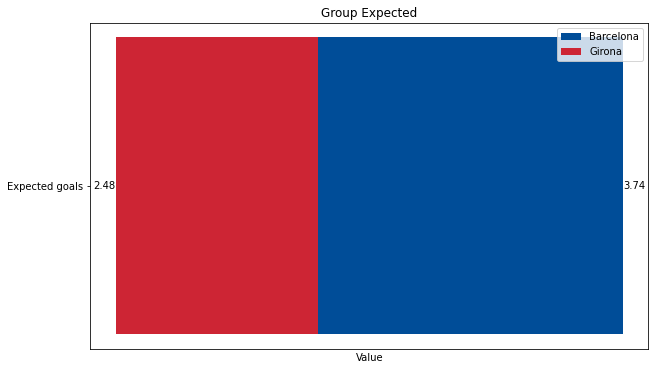

In [13]:
show_stats_data(match_statistics['0']['statistics'][0])

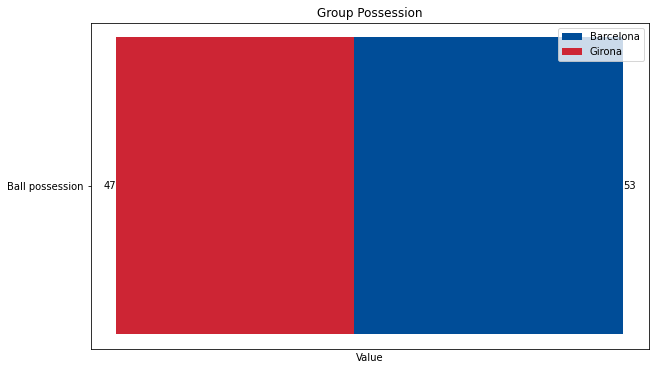

In [14]:
# Assuming your JSON is stored in a variable named 'match_statistics'
show_stats_data(match_statistics['0']['statistics'][1])

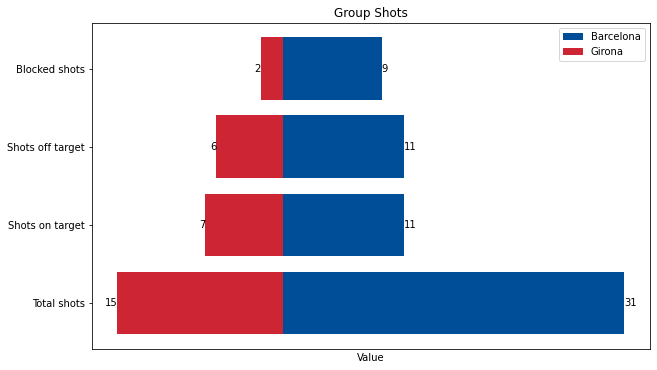

In [15]:
show_stats_data(match_statistics['0']['statistics'][2])

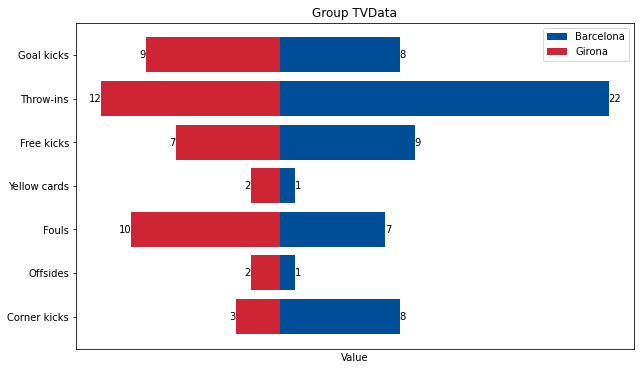

In [16]:
show_stats_data(match_statistics['0']['statistics'][3])

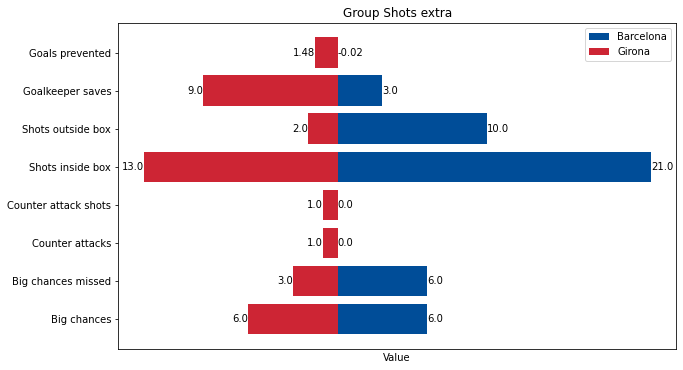

In [17]:
show_stats_data(match_statistics['0']['statistics'][4])

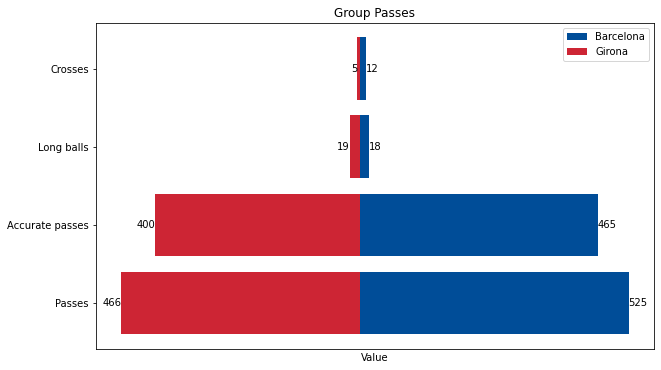

In [18]:
show_stats_data(match_statistics['0']['statistics'][5])

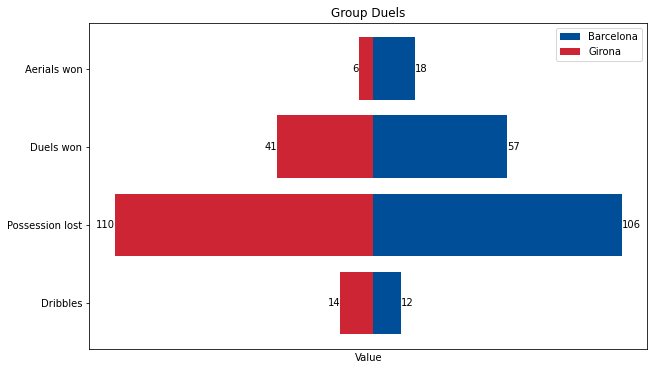

In [19]:
show_stats_data(match_statistics['0']['statistics'][6])

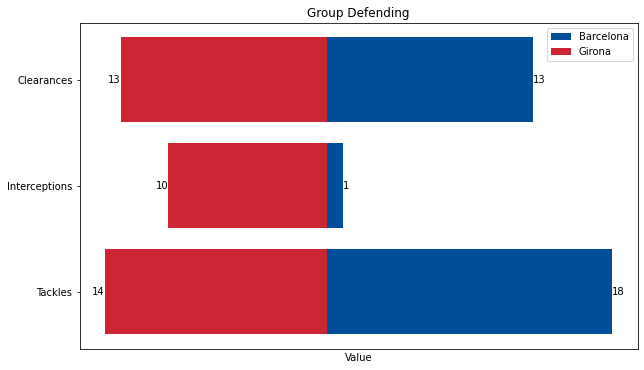

In [20]:
show_stats_data(match_statistics['0']['statistics'][7])

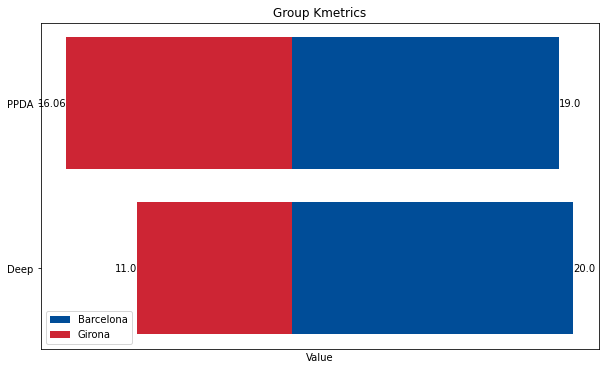

In [21]:
show_stats_data(match_statistics['0']['statistics'][8])

## Attempts at Goal

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from mplsoccer.pitch import VerticalPitch


import json

# Load data from the sofascore file
with open('data/sofascore/shots.json', 'r') as f:
    shotmap_data = json.load(f)

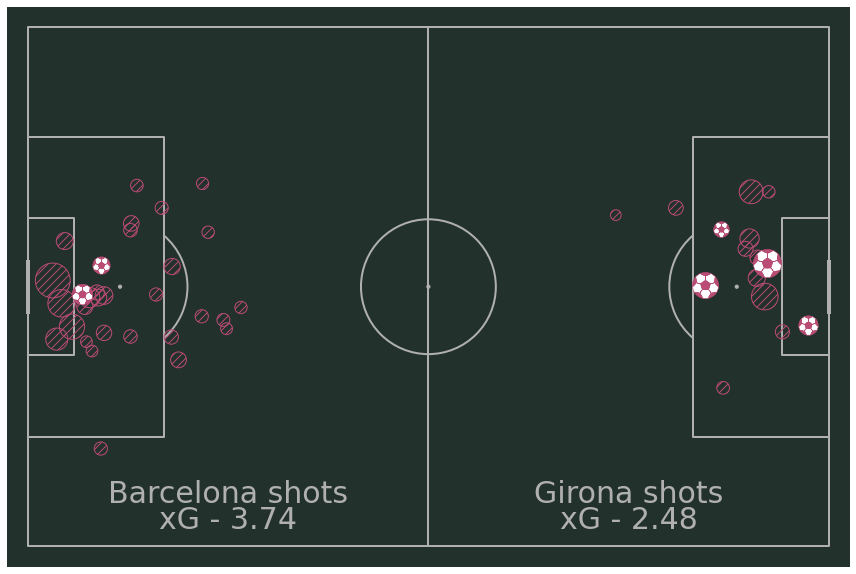

In [16]:
# Extract shot data for Girona
shots = shotmap_data['shotmap']

# Create an mplsoccer Pitch
pitch = Pitch(pitch_type='opta', pitch_color='#22312b')

# Plot the shots on the pitch
fig, ax = pitch.draw(figsize=(12, 10))

# Separate goal and non-goal shots for Girona at away games
girona_goal_shots = [shot for shot in shots if shot['isHome'] == False and shot['shotType'] == 'goal']
girona_non_goal_shots = [shot for shot in shots if shot['isHome'] == False and shot['shotType'] != 'goal']

# Plot Girona non-goal shots with hatch
for shot in girona_non_goal_shots:
    x = 100 - shot['playerCoordinates']['x']
    y = 100 - shot['playerCoordinates']['y']
    xg = shot['xg']
    
    pitch.scatter(x, y, s=(xg * 1600) + 100, edgecolors='#b94b75', c='None', hatch='///', marker='o', ax=ax)

# Plot Girona goal shots with a color
for shot in girona_goal_shots:
    x = 100 - shot['playerCoordinates']['x']
    y = 100 - shot['playerCoordinates']['y']
    xg = shot['xg']
    
    pitch.scatter(x, y, s=(xg * 1600) + 100, edgecolors='#b94b75', linewidths=0.6, c='white', marker='football', ax=ax)

# Separate goal and non-goal shots for Barcelona at home games
barcelona_goal_shots = [shot for shot in shots if shot['isHome'] == True and shot['shotType'] == 'goal']
barcelona_non_goal_shots = [shot for shot in shots if shot['isHome'] == True and shot['shotType'] != 'goal']

# Plot Barcelona non-goal shots with hatch
for shot in barcelona_non_goal_shots:
    x = shot['playerCoordinates']['x']
    y = shot['playerCoordinates']['y']
    xg = shot['xg']
    
    pitch.scatter(x, y, s=(xg * 1600) + 100, edgecolors='#b94b75', c='None', hatch='///', marker='o', ax=ax)

# Plot Barcelona goal shots with a color
for shot in barcelona_goal_shots:
    x = shot['playerCoordinates']['x']
    y = shot['playerCoordinates']['y']
    xg = shot['xg']
    
    pitch.scatter(x, y, s=(xg * 1600) + 100, edgecolors='#b94b75', linewidths=0.6, c='white', marker='football', ax=ax)

# Add title
txt = ax.text(x=25, y=10, s='Barcelona shots', size=30, color=pitch.line_color, va='center', ha='center')
txt = ax.text(x=75, y=10, s='Girona shots', size=30, color=pitch.line_color, va='center', ha='center')
txt = ax.text(x=25, y=5, s='xG - 3.74', size=30, color=pitch.line_color, va='center', ha='center')
txt = ax.text(x=75, y=5, s='xG - 2.48', size=30, color=pitch.line_color, va='center', ha='center')

plt.show()

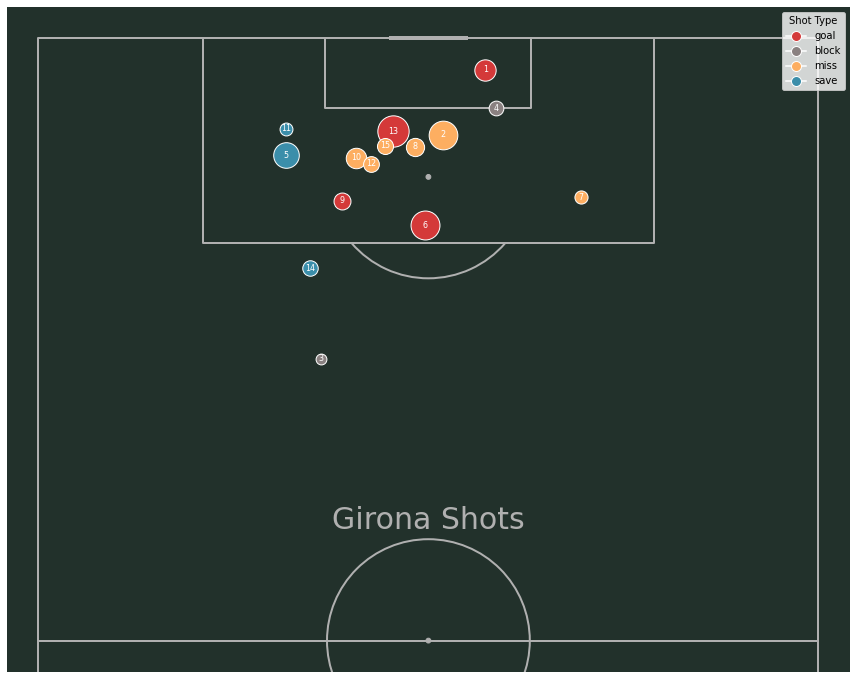

In [23]:
# Extract shot data for Girona
girona_shots = shotmap_data['shotmap']

# Create an mplsoccer Pitch
pitch = VerticalPitch(pitch_type='opta', pitch_color='#22312b', half=True)

# Plot the shots on the pitch
fig, ax = pitch.draw(figsize=(12, 10))

# Dictionary to map shot types to colors
shot_type_colors = {
    'goal': '#d43939',
    'block': '#8a8181',
    'miss': '#fdae61',
    'save': '#3b8eaa'
}

# Separate goal and non-goal shots for Girona at away games
girona_goal_shots_away = [shot for shot in girona_shots if shot['isHome'] == False]


# Plot non-goal shots with hatch
for i, shot in enumerate(girona_goal_shots_away):
    x = 100 - shot['playerCoordinates']['y']
    y = 100 - shot['playerCoordinates']['x']
    xg = shot['xg']
    shot_type = shot['shotType']
    
    color = shot_type_colors.get(shot_type)
    
    ax.scatter(x, y, s=(xg * 1900) + 100, edgecolors='white', c=color, marker='o')
    ax.text(x, y, s=str(i+1), color='white', ha='center', va='center', fontsize=8)

# Add title
txt = ax.text(x=50, y=60, s='Girona Shots', size=30, color=pitch.line_color, va='center', ha='center')

# Add legend for shot types
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=shot_type, markerfacecolor=color, markersize=10) for shot_type, color in shot_type_colors.items()]
ax.legend(handles=legend_elements, loc='upper right', title='Shot Type')


plt.show()


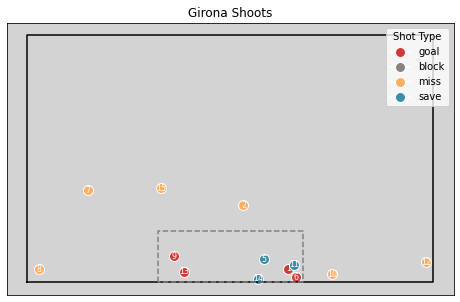

In [24]:
# Extract shot data for Girona
shots = shotmap_data['shotmap']
# Create a function to plot the football goal, shots, and goal area
def plot_goal_shots_and_area(shotmap_data):

    # Create a football goal plot
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.set_facecolor('lightgrey')  # Set background color
    ax.plot([-20, -20, 120, 120, -20], [0, 120, 120, 0, 0], color='black')  # Football goal outline
    
    girona_shots = [shot for shot in shotmap_data if shot['isHome'] == False]
    

    # Scatter shots on the goal for non-home shots
    for i, shot in enumerate(girona_shots):
        if shot['shotType'] != 'block':
            goal_coordinates = shot['draw']['goal']
            shot_type = shot['shotType']
            color = shot_type_colors.get(shot_type)
            if (50 - goal_coordinates['x']) >= 0:
                ax.scatter(50 - ((50 - goal_coordinates['x'])*5), (100 - goal_coordinates['y'])/1.7, s=100, marker='o', edgecolors='white', c=color)
                ax.text(50 - ((50 - goal_coordinates['x'])*5), (100 - goal_coordinates['y'])/1.7, s=str(i+1), color='white', ha='center', va='center', fontsize=8)
            else:
                ax.scatter(50 + (abs((50 - goal_coordinates['x']))*5), (100 - goal_coordinates['y'])/1.7, s=100, marker='o', edgecolors='white', c=color)
                ax.text(50 + (abs((50 - goal_coordinates['x']))*5), (100 - goal_coordinates['y'])/1.7, s=str(i+1), color='white', ha='center', va='center', fontsize=8)

    # Draw the football goal area
    goal_area_x = [25, 25, 75, 75, 25]
    goal_area_y = [0, 25, 25, 0, 0]
    ax.plot(goal_area_x, goal_area_y, color='gray', linestyle='dashed', label='Goal Area')

    # Hide axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('Girona Shoots')

    # Add legend for shot types
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=shot_type, markerfacecolor=color, markersize=10) for shot_type, color in shot_type_colors.items()]
    ax.legend(handles=legend_elements, loc='upper right', title='Shot Type')

    # Show the plot
    plt.show()

# Call the function with your shotmap data
plot_goal_shots_and_area(shots)

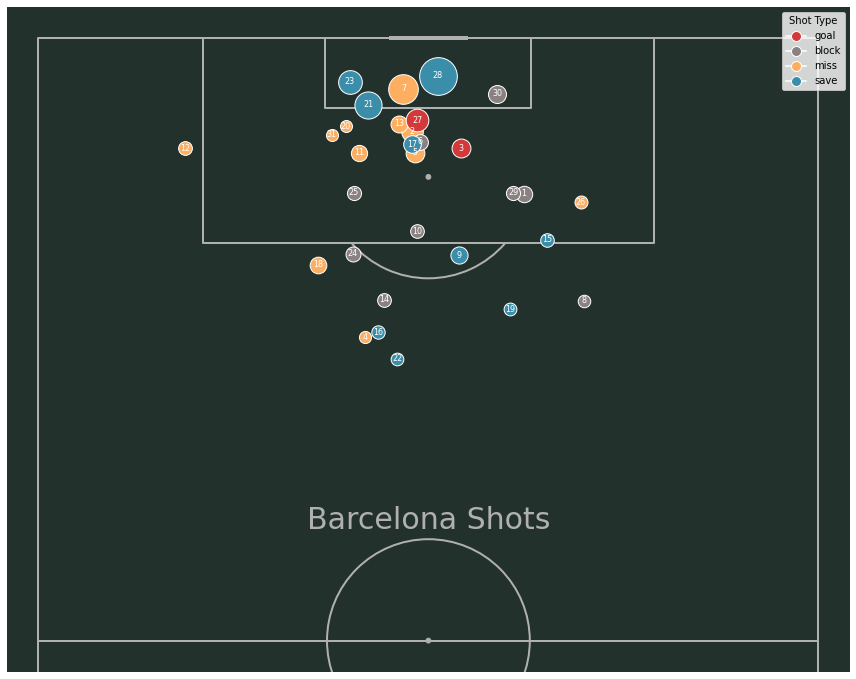

In [25]:
# Extract shot data for Girona
barcelona_shots = shotmap_data['shotmap']

# Create an mplsoccer Pitch
pitch = VerticalPitch(pitch_type='opta', pitch_color='#22312b', half=True)

# Plot the shots on the pitch
fig, ax = pitch.draw(figsize=(12, 10))

# Dictionary to map shot types to colors
shot_type_colors = {
    'goal': '#d43939',
    'block': '#8a8181',
    'miss': '#fdae61',
    'save': '#3b8eaa'
}

# Separate goal and non-goal shots for Girona at away games
barcelona_goal_shots = [shot for shot in barcelona_shots if shot['isHome'] == True]

# Plot non-goal shots with hatch
for i, shot in enumerate(barcelona_goal_shots):
    x = 100 - shot['playerCoordinates']['y']
    y = 100 - shot['playerCoordinates']['x']
    xg = shot['xg']
    shot_type = shot['shotType']
    
    color = shot_type_colors.get(shot_type)
    
    ax.scatter(x, y, s=(xg * 1900) + 100, edgecolors='white', c=color, marker='o')
    ax.text(x, y, s=str(i+1), color='white', ha='center', va='center', fontsize=8)

# Add title
txt = ax.text(x=50, y=60, s='Barcelona Shots', size=30, color=pitch.line_color, va='center', ha='center')

# Add legend for shot types
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=shot_type, markerfacecolor=color, markersize=10) for shot_type, color in shot_type_colors.items()]
ax.legend(handles=legend_elements, loc='upper right', title='Shot Type')


plt.show()

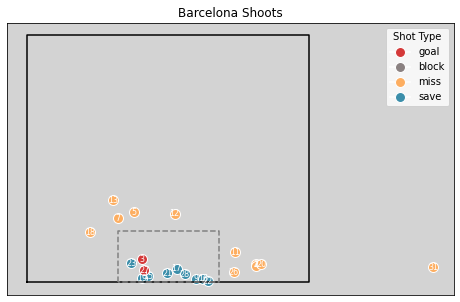

In [26]:
# Create a function to plot the football goal, shots, and goal area
def plot_goal_shots_and_area(shotmap_data):

    # Create a football goal plot
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.set_facecolor('lightgrey')  # Set background color
    ax.plot([-20, -20, 120, 120, -20], [0, 120, 120, 0, 0], color='black')  # Football goal outline
    
    girona_shots = [shot for shot in shotmap_data if shot['isHome'] == True]
    

    # Scatter shots on the goal for non-home shots
    for i, shot in enumerate(girona_shots):
        if shot['shotType'] != 'block':
            goal_coordinates = shot['draw']['goal']
            shot_type = shot['shotType']
            color = shot_type_colors.get(shot_type)
            if (50 - goal_coordinates['x']) >= 0:
                ax.scatter(50 - ((50 - goal_coordinates['x'])*5), (100 - goal_coordinates['y'])/1.7, s=100, marker='o', edgecolors='white', c=color)
                ax.text(50 - ((50 - goal_coordinates['x'])*5), (100 - goal_coordinates['y'])/1.7, s=str(i+1), color='white', ha='center', va='center', fontsize=8)
            else:
                ax.scatter(50 + (abs((50 - goal_coordinates['x']))*5), (100 - goal_coordinates['y'])/1.7, s=100, marker='o', edgecolors='white', c=color)
                ax.text(50 + (abs((50 - goal_coordinates['x']))*5), (100 - goal_coordinates['y'])/1.7, s=str(i+1), color='white', ha='center', va='center', fontsize=8)

    # Draw the football goal area
    goal_area_x = [25, 25, 75, 75, 25]
    goal_area_y = [0, 25, 25, 0, 0]
    ax.plot(goal_area_x, goal_area_y, color='gray', linestyle='dashed', label='Goal Area')

    # Hide axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('Barcelona Shoots')

    # Add legend for shot types
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=shot_type, markerfacecolor=color, markersize=10) for shot_type, color in shot_type_colors.items()]
    ax.legend(handles=legend_elements, loc='upper right', title='Shot Type')

    # Show the plot
    plt.show()

# Call the function with your shotmap data
plot_goal_shots_and_area(shots)

## Passes Flow

In [128]:
import json

import numpy as np
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from mplsoccer import Pitch, FontManager, Sbopen

with open("./data/WhoScored/match_1734731.json") as f:
    data_dict = json.load(f)
#data_dict.keys()

In [129]:
def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]
    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict

In [130]:
events_dict, players_df, teams_dict = extract_data_from_dict(data_dict)
home_team_id = 2783
away_team_id = 65

In [131]:
def get_passes_df(events_dict, team_id):
    df = pd.DataFrame(events_dict)
    df['eventType'] = df.apply(lambda row: row['type']['displayName'], axis=1)
    df['outcomeType'] = df.apply(lambda row: row['outcomeType']['displayName'], axis=1)


    # filter only passes and team
    passes_ids = df.index[(df['eventType'] == 'Pass') & (df['teamId'] == team_id)]
    df_passes = df.loc[
        passes_ids, ["id", "x", "y", "endX", "endY", "teamId", "playerId", "eventType", "outcomeType"]]

    return df_passes

In [132]:
home_team_df_pass = get_passes_df(events_dict, home_team_id)
# home_team_df_pass

In [134]:
# away_team_df_pass
away_team_df_pass = get_passes_df(events_dict, away_team_id)

In [135]:
pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color='#c7d5cc', pitch_color='#22312b')
bins = (6, 4)

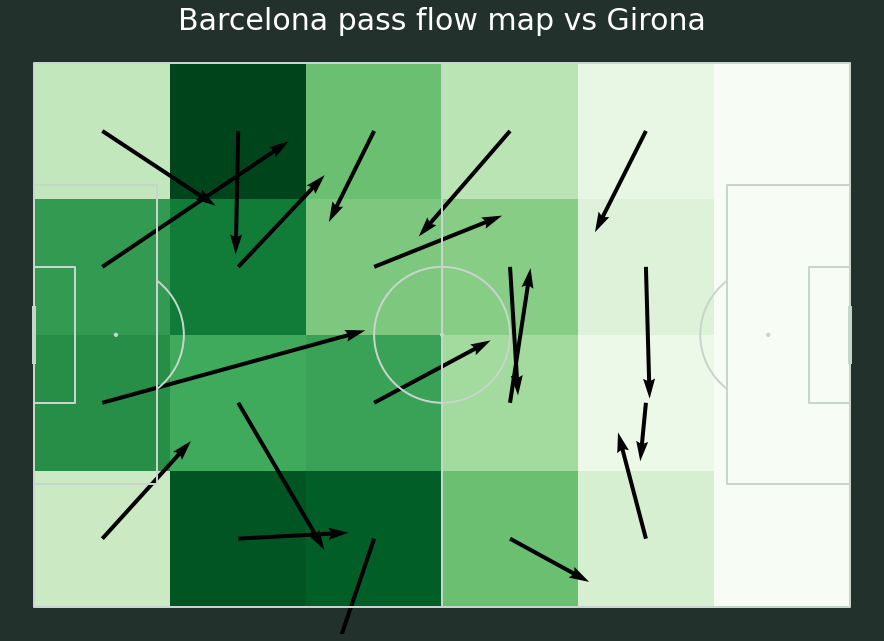

In [136]:
# Barcelona
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(home_team_df_pass.x, home_team_df_pass.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Greens')
# plot the pass flow map with a single color and the
# arrow length equal to the average distance in the cell
fm = pitch.flow(home_team_df_pass.x, home_team_df_pass.y, home_team_df_pass.endX, home_team_df_pass.endY, color='black',
                arrow_type='average', bins=bins, ax=ax)
ax_title = ax.set_title(f'Barcelona pass flow map vs Girona', fontsize=30, pad=-20, color = 'white')

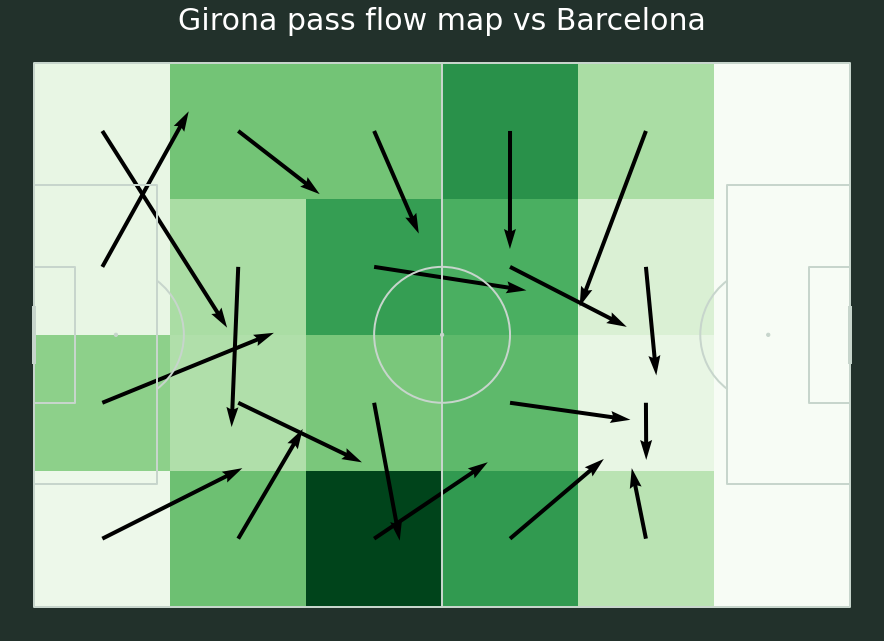

In [137]:
#Girona
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(away_team_df_pass.x, away_team_df_pass.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Greens')
# plot the pass flow map with a single color and the
# arrow length equal to the average distance in the cell
fm = pitch.flow(away_team_df_pass.x, away_team_df_pass.y, away_team_df_pass.endX, away_team_df_pass.endY, color='black',
                arrow_type='average', bins=bins, ax=ax)
ax_title = ax.set_title(f'Girona pass flow map vs Barcelona', fontsize=30, pad=-20, color = 'white')

## Passes Networks

In [29]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontManager
from matplotlib.colors import to_rgba
from mplsoccer import Pitch

with open("./data/WhoScored/match_1734731.json") as f:
    data_dict = json.load(f)
#data_dict.keys()

In [30]:
def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]
    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict

In [31]:
events_dict, players_df, teams_dict = extract_data_from_dict(data_dict)
len(events_dict)
teams_dict
home_team_id = 2783
away_team_id = 65
# home_team_id, away_team_id

In [32]:
def get_passes_df(events_dict):
    df = pd.DataFrame(events_dict)
    df['eventType'] = df.apply(lambda row: row['type']['displayName'], axis=1)
    df['outcomeType'] = df.apply(lambda row: row['outcomeType']['displayName'], axis=1)

    # create receiver column based on the next event
    # this will be correct only for successfull passes
    df["receiver"] = df["playerId"].shift(-1)

    # filter only passes
    passes_ids = df.index[df['eventType'] == 'Pass']
    df_passes = df.loc[
        passes_ids, ["id", "x", "y", "endX", "endY", "teamId", "playerId", "receiver", "eventType", "outcomeType"]]

    return df_passes

In [39]:
passes_df = get_passes_df(events_dict)
#passes_df

In [40]:
def get_passes_between_df(team_id, passes_df, players_df):
    # filter for only team
    print(team_id)
    passes_df = passes_df[passes_df["teamId"] == team_id]

    # add column with first eleven players only
    passes_df = passes_df.merge(players_df[["playerId", "isFirstEleven"]], on='playerId', how='left')
    # filter on first eleven column
    passes_df = passes_df[passes_df['isFirstEleven'] == True]

    # calculate mean positions for players
    average_locs_and_count_df = (passes_df.groupby('playerId')
                                 .agg({'x': ['mean'], 'y': ['mean', 'count']}))
    average_locs_and_count_df.columns = ['x', 'y', 'count']
    average_locs_and_count_df = average_locs_and_count_df.merge(players_df[['playerId', 'name', 'shirtNo', 'position']],
                                                                on='playerId', how='left')
    average_locs_and_count_df = average_locs_and_count_df.set_index('playerId')
    # print(average_locs_and_count_df)

    # calculate the number of passes between each position (using min/ max so we get passes both ways)
    passes_player_ids_df = passes_df.loc[:, ['id', 'playerId', 'receiver', 'teamId']]
    passes_player_ids_df['pos_max'] = (passes_player_ids_df[['playerId', 'receiver']].max(axis='columns'))
    passes_player_ids_df['pos_min'] = (passes_player_ids_df[['playerId', 'receiver']].min(axis='columns'))

    # get passes between each player
    passes_between_df = passes_player_ids_df.groupby(['pos_min', 'pos_max']).id.count().reset_index()
    passes_between_df.rename({'id': 'pass_count'}, axis='columns', inplace=True)

    # add on the location of each player so we have the start and end positions of the lines
    passes_between_df = passes_between_df.merge(average_locs_and_count_df, left_on='pos_min', right_index=True)
    passes_between_df = passes_between_df.merge(average_locs_and_count_df, left_on='pos_max', right_index=True,
                                                suffixes=['', '_end'])
    return passes_between_df, average_locs_and_count_df

In [41]:
#home_passes_between_df, home_average_locs_and_count_df = get_passes_between_df(team_id=home_team_id, passes_df=passes_df, players_df=players_df)
#home_passes_between_df

In [42]:
#away_passes_between_df, away_average_locs_and_count_df = get_passes_between_df(team_id=away_team_id, passes_df=passes_df, players_df=players_df)
#away_passes_between_df

In [43]:
def pass_network_visualization(ax, passes_between_df, average_locs_and_count_df, flipped=False):
    MAX_LINE_WIDTH = 10
    MAX_MARKER_SIZE = 3000
    passes_between_df['width'] = (passes_between_df.pass_count / passes_between_df.pass_count.max() *
                                  MAX_LINE_WIDTH)
    average_locs_and_count_df['marker_size'] = (average_locs_and_count_df['count']
                                                / average_locs_and_count_df['count'].max() * MAX_MARKER_SIZE)

    MIN_TRANSPARENCY = 0.3
    color = np.array(to_rgba('#507293'))
    color = np.tile(color, (len(passes_between_df), 1))
    c_transparency = passes_between_df.pass_count / passes_between_df.pass_count.max()
    c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency

    pitch = Pitch(pitch_type='opta', pitch_color='#0D182E', line_color='#5B6378')
    pitch.draw(ax=ax)

    if flipped:
        passes_between_df['x'] = pitch.dim.right - passes_between_df['x']
        passes_between_df['y'] = pitch.dim.right - passes_between_df['y']
        passes_between_df['x_end'] = pitch.dim.right - passes_between_df['x_end']
        passes_between_df['y_end'] = pitch.dim.right - passes_between_df['y_end']
        average_locs_and_count_df['x'] = pitch.dim.right - average_locs_and_count_df['x']
        average_locs_and_count_df['y'] = pitch.dim.right - average_locs_and_count_df['y']

    pass_lines = pitch.lines(passes_between_df.x, passes_between_df.y,
                             passes_between_df.x_end, passes_between_df.y_end, lw=passes_between_df.width,
                             color=color, zorder=1, ax=ax)
    pass_nodes = pitch.scatter(average_locs_and_count_df.x, average_locs_and_count_df.y,
                               s=average_locs_and_count_df.marker_size, marker='h',
                               color='#FEFEFC', edgecolors='#FEFEFC', linewidth=1, alpha=1, ax=ax)
    for index, row in average_locs_and_count_df.iterrows():
        print(row)
        player_name = row["name"].split()
        player_initials = "".join(word[0] for word in player_name).upper()
        pitch.annotate(player_initials, xy=(row.x, row.y), c='#C4C4C4', va='center',
                       ha='center', size=14, ax=ax)

    return pitch

x                   40.765
y                80.163333
count                   60
name           Daley Blind
shirtNo                 17
position                DC
marker_size    2432.432432
Name: 70033.0, dtype: object
x                    28.95
y                52.847222
count                   36
name           David López
shirtNo                  5
position                DC
marker_size    1459.459459
Name: 92691.0, dtype: object
x                    11.065909
y                    42.654545
count                       44
name           Paulo Gazzaniga
shirtNo                     13
position                    GK
marker_size        1783.783784
Name: 104732.0, dtype: object
x                     55.165625
y                     39.390625
count                        32
name           Viktor Tsygankov
shirtNo                       8
position                    AMC
marker_size         1297.297297
Name: 231125.0, dtype: object
x                 47.972973
y                 58.371622
count  

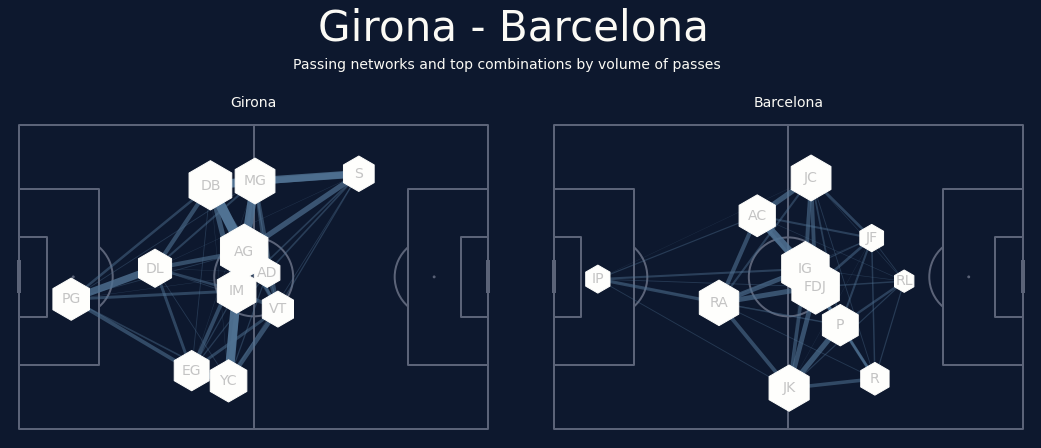

In [125]:
# create plot
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
axes = axes.flat
plt.tight_layout()
fig.set_facecolor("#0D182E")

# plot variables
main_color = '#FBFAF5'
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "RobotoCondensed-Medium.ttf?raw=true"))

# home team viz
pass_network_visualization(axes[0], home_passes_between_df, home_average_locs_and_count_df)
axes[0].set_title(teams_dict[home_team_id], color=main_color, fontsize=14)#, fontproperties=font_bold.prop)

# away team viz
pass_network_visualization(axes[1], away_passes_between_df, away_average_locs_and_count_df, flipped=True)
axes[1].set_title(teams_dict[away_team_id], color=main_color, fontsize=14)#, fontproperties=font_bold.prop)

plt.suptitle(f"{teams_dict[home_team_id]} - {teams_dict[away_team_id]}", color=main_color, fontsize=42)#, fontproperties=font_bold.prop)
subtitle = "Passing networks and top combinations by volume of passes"
plt.text(-10, 120, subtitle, horizontalalignment='center', verticalalignment='center', color=main_color, fontsize=14)#, fontproperties=font_bold.prop)
plt.show()

## Cumulative xG

In [52]:
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.lines import Line2D
from matplotlib import font_manager

with open('./data/sofascore/shots.json') as f:
    shotmap = json.load(f)

shots = pd.json_normalize(shotmap["shotmap"])
#shots

# Barcelona cumulative xG
home_xg_cum = shots[shots["isHome"] == True][["isHome", "shotType", "xg", "timeSeconds", "player.name"]]
home_xg_cum["minute"] = round(home_xg_cum["timeSeconds"]/60).astype(int)
home_xg_cum.sort_values(by="minute", inplace=True)
home_xg_cum["xg_cum"] = home_xg_cum["xg"].cumsum()

# Girona cumulative xG
away_xg_cum = shots[shots["isHome"] == False][["isHome", "shotType", "xg", "timeSeconds", "player.name"]]
away_xg_cum["minute"] = round(away_xg_cum["timeSeconds"]/60).astype(int)
away_xg_cum.sort_values(by="minute", inplace=True)
away_xg_cum["xg_cum"] = away_xg_cum["xg"].cumsum()
#away_xg_cum

home_goals = home_xg_cum[home_xg_cum["shotType"] == "goal"][["isHome", "minute", "player.name", "xg_cum"]]
home_goals["scorechart"] = home_goals["minute"].astype(str) + "'" + " " + home_goals["player.name"]
home_goal_count = len(home_goals)

away_goals = away_xg_cum[away_xg_cum["shotType"] == "goal"][["isHome", "minute", "player.name", "xg_cum"]]
away_goals["scorechart"] = away_goals["minute"].astype(int).astype(str) + "'" + " " + away_goals["player.name"]
away_goal_count = len(away_goals)
#away_goals

home_xg_total = round(home_xg_cum["xg"].sum(), 2).astype(str)
away_xg_total = round(away_xg_cum["xg"].sum(), 2).astype(str)

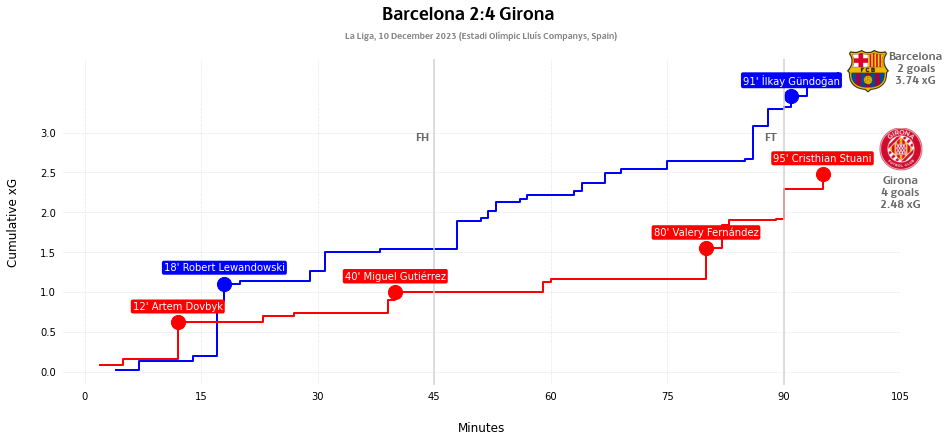

In [54]:
def set_plot_title(suptitle, title):    
    plt.suptitle(suptitle, fontsize=20, fontproperties=font_properties, y=1)
    plt.title(title, fontsize=14, fontproperties=font_properties, color="gray", pad=20)
    
def annotate_goals(goals):
    for i, row in goals.iterrows():
        facecolor = "blue" if row["isHome"] else "red"
        
        plt.text(
            row["minute"], 
            row["xg_cum"] + 0.2, 
            row["scorechart"], 
            ha="center", 
            va="center", 
            fontsize=10, 
            color="white", 
            bbox=dict(
                facecolor=facecolor,
                edgecolor="None",
                boxstyle="round,pad=0.2"
            )
        )

fig, ax = plt.subplots(figsize=(15,6))

font_properties = font_manager.FontProperties(fname="./fonts/Champions-Bold.ttf")

set_plot_title(
    suptitle="Barcelona 2:4 Girona", 
    title="La Liga, 10 December 2023 (Estadi Olímpic Lluís Companys, Spain)"
)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.step(x=home_xg_cum["minute"], y=home_xg_cum["xg_cum"], where="post", color="blue", label=f"Barcelona {home_xg_total}", linewidth=2)  
ax.step(x=away_xg_cum["minute"], y=away_xg_cum["xg_cum"], where="post", color="red", label= f"Girona {away_xg_total}", linewidth=2)

ax.scatter(x=home_goals["minute"], y=home_goals["xg_cum"], marker="o", s=200, color="blue")
ax.scatter(x=away_goals["minute"], y=away_goals["xg_cum"], marker="o", s=200, color="red")

plt.xticks([0, 15, 30, 45, 60, 75, 90, 105])
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])

ax.tick_params(axis="both", which="both", bottom=False, top=False, left=False, right=False)
ax.grid(True, linestyle="dotted", alpha=0.5, color="gray", linewidth=0.5)

ax.axvline(x=45, color="lightgray")
ax.axvline(x=90, color="lightgray")
plt.text(42.5, 2.9, "FH", color="dimgray", fontsize=13, fontproperties=font_properties)
plt.text(87.5, 2.9, "FT", color="dimgray", fontsize=13, fontproperties=font_properties)

annotate_goals(home_goals)
annotate_goals(away_goals)

stat_text_options = dict(ha="center", va="center", color="dimgray", fontsize=13, fontproperties=font_properties)
plt.text(107, 3.95, "Barcelona", **stat_text_options)
plt.text(107, 3.8, f"{home_goal_count} goals", **stat_text_options)
plt.text(107, 3.65, f"{home_xg_total} xG", **stat_text_options)

plt.text(105, 2.4, "Girona", **stat_text_options)
plt.text(105, 2.25, f"{away_goal_count} goals", **stat_text_options)
plt.text(105, 2.1, f"{away_xg_total} xG", **stat_text_options)

plt.ylabel("Cumulative xG", fontsize=12, labelpad=20)
plt.xlabel("Minutes", fontsize=12, labelpad=20)

home_logo = mpimg.imread("./img/Barcelona.png")
ax_home_logo = fig.add_axes([0.82, 0.8, 0.1, 0.1])
ax_home_logo.imshow(home_logo)
ax_home_logo.axis("off")

away_logo = mpimg.imread("./img/Girona.png")
ax_away_logo = fig.add_axes([0.85, 0.62, 0.1, 0.1])
ax_away_logo.imshow(away_logo)
ax_away_logo.axis("off")

plt.savefig("./img/Cumulative_xg.png", dpi=300, bbox_inches="tight")

plt.show()

## Radar chart

In [87]:
import pandas as pd
from scipy import stats
import sklearn
df_understat = pd.read_json('./data/under_shot_data.json')
df_sofascore = pd.read_json('./data/sofa_shot_data.json')

def data_scale(data, scaler_type='minmax'):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import Normalizer
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    if scaler_type == 'std':
        scaler = StandardScaler()
    if scaler_type == 'norm':
        scaler = preprocessing.Normalizer()

    scaler.fit(data)
    res = scaler.transform(data)
    return res


In [94]:
df_understat.info()
print(df_understat.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               46 non-null     int64         
 1   minute           46 non-null     int64         
 2   result           46 non-null     object        
 3   X                46 non-null     float64       
 4   Y                46 non-null     float64       
 5   xG               46 non-null     float64       
 6   player           46 non-null     object        
 7   h_a              46 non-null     object        
 8   player_id        46 non-null     int64         
 9   situation        46 non-null     object        
 10  season           46 non-null     int64         
 11  shotType         46 non-null     object        
 12  match_id         46 non-null     int64         
 13  h_team           46 non-null     object        
 14  a_team           46 non-null     object     

In [95]:
data_understat = df_understat[['player', 'X', 'Y', 'xG']]
print(data_understat)

                player      X      Y        xG
0             Raphinha  0.920  0.624  0.027585
1   Robert Lewandowski  0.954  0.412  0.135576
2           João Félix  0.872  0.391  0.076541
3             Raphinha  0.969  0.488  0.654123
4   Robert Lewandowski  0.932  0.514  0.126038
5             Raphinha  0.864  0.305  0.040520
6           João Félix  0.872  0.596  0.085429
7       Ilkay Gündogan  0.834  0.594  0.055819
8         João Cancelo  0.964  0.601  0.434831
9             Raphinha  0.734  0.540  0.021653
10  Robert Lewandowski  0.952  0.568  0.386009
11            Raphinha  0.927  0.606  0.045518
12     Frenkie de Jong  0.756  0.421  0.024202
13            Raphinha  0.812  0.641  0.110629
14            Raphinha  0.912  0.521  0.101295
15      Ilkay Gündogan  0.741  0.579  0.020296
16            Raphinha  0.834  0.368  0.045099
17      Ilkay Gündogan  0.783  0.557  0.031369
18  Robert Lewandowski  0.943  0.554  0.122883
19      Ilkay Gündogan  0.909  0.812  0.072592
20      Ilkay

In [96]:
df_sofascore.info()
print(df_sofascore.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player                     46 non-null     object 
 1   isHome                     46 non-null     bool   
 2   shotType                   46 non-null     object 
 3   situation                  46 non-null     object 
 4   playerCoordinates          46 non-null     object 
 5   bodyPart                   46 non-null     object 
 6   goalMouthLocation          46 non-null     object 
 7   goalMouthCoordinates       46 non-null     object 
 8   blockCoordinates           24 non-null     object 
 9   xg                         46 non-null     float64
 10  id                         46 non-null     int64  
 11  time                       46 non-null     int64  
 12  addedTime                  7 non-null      float64
 13  timeSeconds                46 non-null     int64  
 

In [97]:
data_sofascore = df_sofascore[['player', 'playerCoordinates', 'xg']]
print(data_sofascore.head())

                                              player  \
0  {'name': 'Fermín López', 'firstName': 'Fermín ...   
1  {'name': 'Cristhian Stuani', 'slug': 'cristhia...   
2  {'name': 'Robert Lewandowski', 'firstName': ''...   
3  {'name': 'İlkay Gündoğan', 'slug': 'ilkay-gund...   
4  {'name': 'Ferran Torres', 'slug': 'ferran-torr...   

                playerCoordinates        xg  
0  {'x': 12.9, 'y': 62.2, 'z': 0}  0.089518  
1   {'x': 2.6, 'y': 57.3, 'z': 0}  0.186681  
2   {'x': 7.7, 'y': 47.9, 'z': 0}  0.195696  
3   {'x': 9.1, 'y': 54.2, 'z': 0}  0.134803  
4  {'x': 24.8, 'y': 41.9, 'z': 0}  0.024742  


In [ ]:
data_sofascore['player_name'] = [x['name'] for x in data_sofascore['player']]
data_sofascore['X'] = [x['x'] for x in data_sofascore['playerCoordinates']]
data_sofascore['Y'] = [x['y'] for x in data_sofascore['playerCoordinates']]
data_sofascore['player_name']

In [99]:
data_sofascore = data_sofascore[['player_name', 'X', 'Y', 'xg']]
print(data_sofascore.head())

          player_name     X     Y        xg
0        Fermín López  12.9  62.2  0.089518
1    Cristhian Stuani   2.6  57.3  0.186681
2  Robert Lewandowski   7.7  47.9  0.195696
3      İlkay Gündoğan   9.1  54.2  0.134803
4       Ferran Torres  24.8  41.9  0.024742


In [100]:
print(data_understat.head())

               player      X      Y        xG
0            Raphinha  0.920  0.624  0.027585
1  Robert Lewandowski  0.954  0.412  0.135576
2          João Félix  0.872  0.391  0.076541
3            Raphinha  0.969  0.488  0.654123
4  Robert Lewandowski  0.932  0.514  0.126038


In [101]:
len(data_understat)

46

In [102]:
len(data_sofascore)

46

In [103]:
set(data_understat['player'])

{'Artem Dovbyk',
 'Cristhian Stuani',
 'David López',
 'Fermín López',
 'Ferrán Torres',
 'Frenkie de Jong',
 'Ilkay Gündogan',
 'Jhon Solis',
 'João Cancelo',
 'João Félix',
 'Jules Koundé',
 'Miguel Gutiérrez',
 'Raphinha',
 'Robert Lewandowski',
 'Sávio',
 'Valery Fernández',
 'Viktor Tsygankov',
 'Yan Couto'}

In [104]:
set(data_sofascore['player_name'])

{'Artem Dovbyk',
 'Cristhian Stuani',
 'David López',
 'Fermín López',
 'Ferran Torres',
 'Frenkie de Jong',
 'Jhon Solís',
 'João Cancelo',
 'João Félix',
 'Jules Koundé',
 'Miguel Gutiérrez',
 'Raphinha',
 'Robert Lewandowski',
 'Sávio',
 'Valery Fernández',
 'Viktor Tsygankov',
 'Yan Couto',
 'İlkay Gündoğan'}

In [105]:
data_understat.describe()

,X,Y,xG
count,46.000000,46.000000,46.000000
mean,0.876217,0.528065,0.156358
std,0.069200,0.108335,0.181039
min,0.728000,0.301000,0.013073
25%,0.835500,0.464000,0.045203
50%,0.902500,0.536000,0.081206
75%,0.923000,0.595500,0.130447
max,0.984000,0.812000,0.654123


In [106]:
data_sofascore.describe()

,X,Y,xg
count,46.000000,46.000000,46.000000
mean,12.200000,47.452174,0.135148
std,6.578382,10.731133,0.142474
min,2.600000,18.800000,0.009018
25%,7.700000,40.475000,0.044768
50%,9.600000,46.500000,0.084365
75%,16.525000,53.400000,0.159605
max,26.600000,69.900000,0.694513


In [107]:
data_sofascore_scaled = data_scale(data_sofascore[['X', 'Y', 'xg']])

In [108]:
data_sofascore_scaled = pd.DataFrame(data_sofascore_scaled, columns=['X', 'Y', 'xg'])
print(data_sofascore_scaled.head())

          X         Y        xg
0  0.429167  0.849315  0.117434
1  0.000000  0.753425  0.259174
2  0.212500  0.569472  0.272326
3  0.270833  0.692759  0.183495
4  0.925000  0.452055  0.022938


In [109]:
import numpy as np
import matplotlib.pyplot as plt


# Функція для побудови графіка типу павутиння
def radar_chart(ax, data, label, color):
    angles = np.linspace(0, 2*np.pi, len(data), endpoint=False)
    data = np.concatenate((data, [data[0]]))  # Замикання кола
    angles = np.concatenate((angles, [angles[0]]))  # Замикання кола
    ax.plot(angles, data, label=label, color=color)
    ax.fill(angles, data, alpha=0.2, color=color)



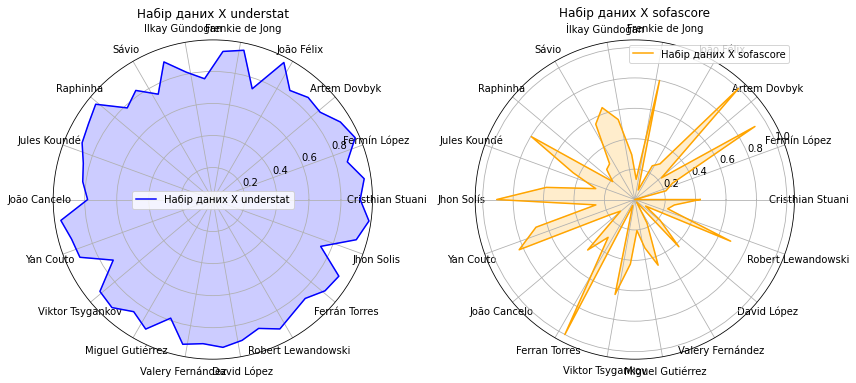

In [110]:
# Дані категорій (імена гравців). Треба привести імена до одного - İlkay Gündoğan
categories_understat = list(set(data_understat['player']))
categories_sofascore = list(set(data_sofascore['player_name']))


# Побудувати графік 1
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1, polar=True)
radar_chart(ax1, data_understat['X'], 'Набір даних X understat', 'blue')
ax1.set_xticks(np.linspace(0, 2*np.pi, len(categories_understat), endpoint=False))
ax1.set_xticklabels(categories_understat)
ax1.set_title('Набір даних X understat')
ax1.legend()

# Побудувати графік 2
ax2 = plt.subplot(1, 2, 2, polar=True)
radar_chart(ax2, data_sofascore_scaled['X'], 'Набір даних X sofascore', 'orange')
ax2.set_xticks(np.linspace(0, 2*np.pi, len(categories_sofascore), endpoint=False))
ax2.set_xticklabels(categories_sofascore)
ax2.set_title('Набір даних X sofascore')
ax2.legend()

# Показати графіки
plt.tight_layout()
plt.show()


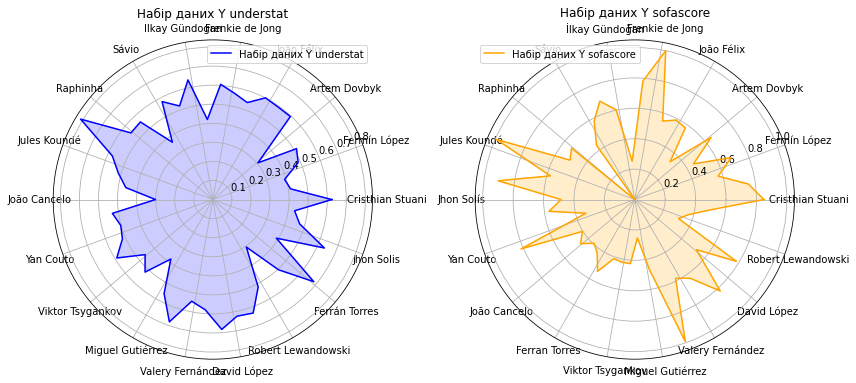

In [111]:
# Побудувати графік 1
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1, polar=True)
radar_chart(ax1, data_understat['Y'], 'Набір даних Y understat', 'blue')
ax1.set_xticks(np.linspace(0, 2*np.pi, len(categories_understat), endpoint=False))
ax1.set_xticklabels(categories_understat)
ax1.set_title('Набір даних Y understat')
ax1.legend()

# Побудувати графік 2
ax2 = plt.subplot(1, 2, 2, polar=True)
radar_chart(ax2, data_sofascore_scaled['Y'], 'Набір даних Y sofascore', 'orange')
ax2.set_xticks(np.linspace(0, 2*np.pi, len(categories_sofascore), endpoint=False))
ax2.set_xticklabels(categories_sofascore)
ax2.set_title('Набір даних Y sofascore')
ax2.legend()

# Показати графіки
plt.tight_layout()
plt.show()


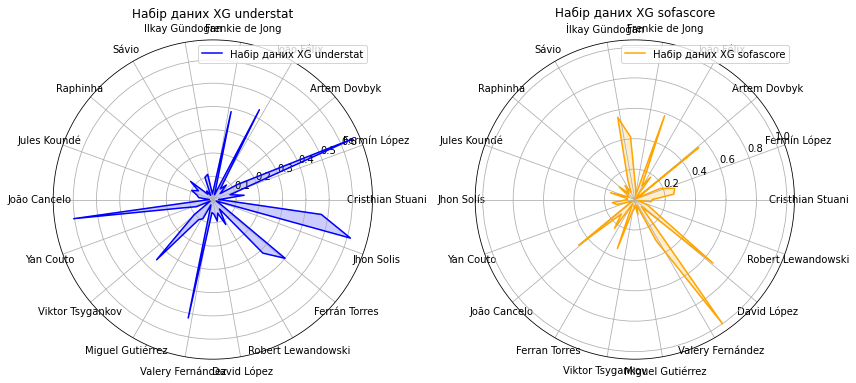

In [112]:
# Побудувати графік 1
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1, polar=True)
radar_chart(ax1, data_understat['xG'], 'Набір даних XG understat', 'blue')
ax1.set_xticks(np.linspace(0, 2*np.pi, len(categories_understat), endpoint=False))
ax1.set_xticklabels(categories_understat)
ax1.set_title('Набір даних XG understat')
ax1.legend()

# Побудувати графік 2
ax2 = plt.subplot(1, 2, 2, polar=True)
radar_chart(ax2, data_sofascore_scaled['xg'], 'Набір даних XG sofascore', 'orange')
ax2.set_xticks(np.linspace(0, 2*np.pi, len(categories_sofascore), endpoint=False))
ax2.set_xticklabels(categories_sofascore)
ax2.set_title('Набір даних XG sofascore')
ax2.legend()

# Показати графіки
plt.tight_layout()
plt.show()


## Comparison of player statistics

In [114]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Путь к JSON файлам с данными игроков
player1_file = './data/player_match_data_11736.json'
player2_file = './data/player_match_data_227.json'

In [116]:
# Загрузка данных об игроках
player1_stats = pd.read_json(player1_file)
player2_stats = pd.read_json(player2_file)

# Создание DataFrame для удобства анализа и визуализации
df1 = pd.DataFrame(player1_stats)
df2 = pd.DataFrame(player2_stats)

#print(df1.describe())
#df1.info()
#print(df1.head())

#print(df2.describe())
#df2.info()
#print(df2.head())

In [118]:
# Имена показателей статистики
stats_labels = [ 'shots', 'xG', 'time', 'position', 'goals', 'xA', 'assists', 'key_passes', 'npg', 'npxG', 'xGChain', 'xGBuildup']

# Значения показателей статистики для каждого игрока
player1_values = [df1[label].iloc[0] for label in stats_labels]
player2_values = [df2[label].iloc[0] for label in stats_labels]

# Углы для графика типа радар
num_vars = len(stats_labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Добавление первого элемента в конец списка, чтобы график был замкнутым
player1_values += player1_values[:1]
player2_values += player2_values[:1]
angles += angles[:1]


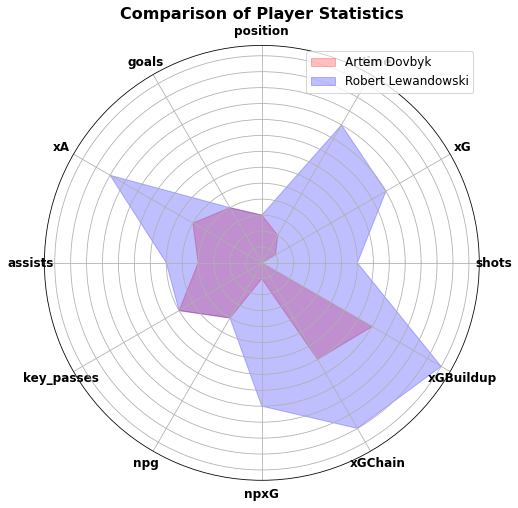

In [119]:
# Построение графика типа радар
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, player1_values, color='red', alpha=0.25, label='Artem Dovbyk')
ax.fill(angles, player2_values, color='blue', alpha=0.25, label='Robert Lewandowski')
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(stats_labels, fontsize=12, fontweight='bold')
ax.legend(loc='upper right', fontsize='large')
plt.title('Comparison of Player Statistics', size=16, weight='bold')
plt.show()